Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.7072 - loss: 0.8541 - val_accuracy: 0.8475 - val_loss: 0.4252
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.8538 - loss: 0.4035 - val_accuracy: 0.8697 - val_loss: 0.3663
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8804 - loss: 0.3351 - val_accuracy: 0.8841 - val_loss: 0.3219
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8917 - loss: 0.2986 - val_accuracy: 0.8900 - val_loss: 0.3008
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9027 - loss: 0.2717 - val_accuracy: 0.8895 - val_loss: 0.3026
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.9093 - loss: 0.2537 - val_accuracy: 0.8955 - val_loss: 0.2807
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9170 - loss: 0.2296 - val_accuracy: 0.9086 - val_loss: 0.2626
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9222 - loss: 0.2177 - 

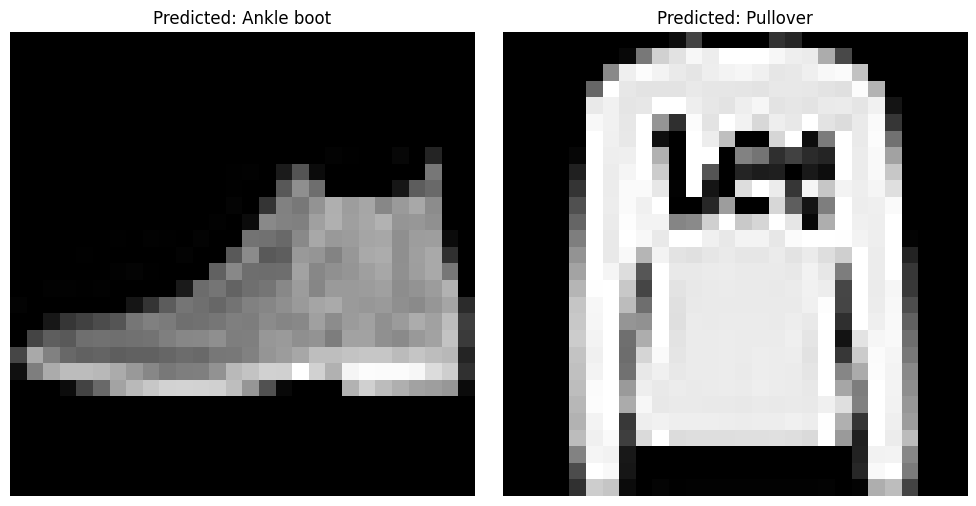

In [5]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess data
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    
    # Normalize pixel values and add channel dimension
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = np.expand_dims(x_train, axis=-1)  # Shape: (60000, 28, 28, 1)
    x_test = np.expand_dims(x_test, axis=-1)     # Shape: (10000, 28, 28, 1)
    
    # Convert labels to one-hot encoding
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    
    return (x_train, y_train), (x_test, y_test)

# Build CNN model
def build_cnn_model():
    model = Sequential([
        # Layer 1: Convolutional
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        # Layer 2: Max Pooling
        MaxPooling2D((2, 2)),
        # Layer 3: Convolutional
        Conv2D(64, (3, 3), activation='relu'),
        # Layer 4: Max Pooling
        MaxPooling2D((2, 2)),
        # Layer 5: Flatten
        Flatten(),
        # Layer 6: Dense
        Dense(128, activation='relu'),
        # Output layer (not counted in the 6 layers)
        Dense(10, activation='softmax')
    ])
    return model

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    (x_train, y_train), (x_test, y_test) = load_and_preprocess_data()
    
    # Build model
    model = build_cnn_model()
    
    # Compile model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train model
    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=1)
    
    # Evaluate model
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f'\nTest accuracy: {test_acc:.4f}')
    
    # Make predictions on two sample images
    sample_images = x_test[:2]
    predictions = model.predict(sample_images)
    predicted_classes = np.argmax(predictions, axis=1)
    
    # Class labels for Fashion MNIST
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    # Display predictions
    plt.figure(figsize=(10, 5))
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(sample_images[i].squeeze(), cmap='gray')
        plt.title(f'Predicted: {class_names[predicted_classes[i]]}')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('fashion_mnist_predictions.png')
    plt.show()